In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path="C:/Users/Artem/Documents/goto hack/"
dfout = pd.read_excel(path + "qiwi_users_money_out_data.xlsx")
dfin = pd.read_excel(path + "qiwi_users_money_in_data.xlsx")
dfu = pd.read_excel(path + "qiwi_users_profile_data.xlsx")

In [8]:
dfout['type']='outcome'

In [9]:
dfin['type']='income'

In [10]:
dfinout=pd.concat([dfin,dfout])

In [13]:
df=pd.merge(dfinout,dfu,on='user_id')

In [99]:
df=df.fillna('Нет')
dfu=dfu.fillna('Нет')

In [19]:
df.to_csv('all_data.csv',index=None,sep=';')

In [28]:
df['tran_year'] = df.date_month.str.split('-').str.get(0).astype(int)
df['tran_month'] = df.date_month.str.split('-').str.get(1).astype(int)
df['graduated_ago'] = df['tran_year'] - df['graduation_year']


In [29]:
df.head(5)

,category,date_month,txn_count,payment,user_id,type,sex,university,faculty,graduation_year,tran_year,tran_month,graduated_ago
0,QIWI,2014-02,1,70,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2014,2,-2
1,QIWI,2016-03,1,200,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2016,3,0
2,QIWI,2016-07,2,1700,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2016,7,0
3,Банки,2014-01,1,50,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2014,1,-2
4,Банки,2014-03,1,700,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2014,3,-2


C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


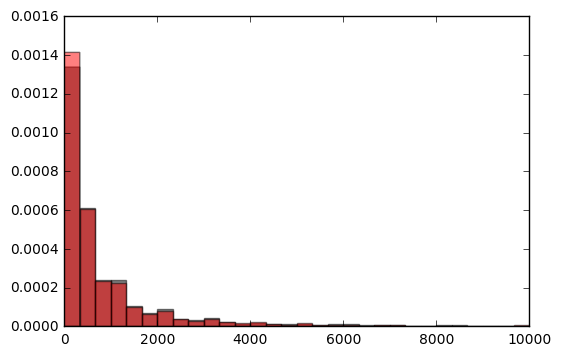

In [34]:

sub_ser1 = df[df['graduated_ago']==-2][df['type']=='outcome'].payment
#print(sum(sub_ser)/len(sub_ser))
#print(np.std(sub_ser))
sub_ser2 = df[df['graduated_ago']==2][df['type']=='outcome'].payment
plt.hist(sub_ser2,30,range=[0,10000],alpha=0.5,normed=True,color='Black')
plt.hist(sub_ser1,30,range=[0,10000],alpha=0.5,normed=True,color='Red')
plt.show()


In [35]:
#sub_df.iloc[1,0]
def get_row(sub_df):
    small_dic={}
    for i in range(len(sub_df)):
        category = sub_df.iloc[i][0]
        if category in small_dic:
            small_dic[category] = small_dic[category] +  sub_df.iloc[i][3]#3 means payment
        else:
            small_dic[category] = sub_df.iloc[i][3]
        
    return small_dic

In [83]:
big_dic = {}
for i in range(1,15113+1):
    if i%1000==0:
        print(i)
    for graduated_ago in [-2,-1,0,1,2,3,4]:
        str_key=str(i) +"_"+ str(graduated_ago)
        
        small_dic= get_row(df[(df['user_id']==i)&(df['graduated_ago']==graduated_ago)])
        small_dic['graduated_ago'] = graduated_ago
        small_dic['user_id'] = i
        big_dic[str_key] = small_dic

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [84]:
df_rost = pd.DataFrame.from_dict(big_dic)
df_rost=df_rost.fillna(0)
df_rost=df_rost.transpose()
df_rost.head()

,IP-телефония,MCMS,MLM,QIWI,QIWI Казахстан,QVC,QVP,QVV,Sim-карты для туристов,VPP,...,Страхование,Такси,Телевидение,Терминалы и отделения партнеров QIWI,Транспортные карты,Туристический продукт,Файлообмен,Форекс,Хостинг,Электронные деньги
10000_-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000_-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df_rost[df_rost]

,user_id,sex,university,faculty,graduation_year
0,1,Муж,ТвГТУ,Дополнительного профессионального образования,2016
1,2,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016
2,3,Нет,МГУ,Глобальных процессов,2017
3,4,Нет,ЧелГУ,Управления,2018
4,5,Нет,ЮУрГУ,Факультет экономики и управления (до 2016 г.),2015


In [54]:
df[df['graduated_ago']==-2]
type(df)

pandas.core.frame.DataFrame

In [85]:
df_rost.to_csv('NEW_data.csv',index=None,sep=';')

In [ ]:

def typ_stud(df)

In [103]:
df_rost.columns.values

array(['IP-телефония', 'MCMS', 'MLM', 'QIWI', 'QIWI Казахстан', 'QVC',
       'QVP', 'QVV', 'Sim-карты для туристов', 'VPP', 'graduated_ago',
       'user_id', 'Абонентское обслуживание', 'Авиабилеты',
       'Агрегатор платежей', 'Банки', 'Билеты в кино', 'Билеты на зрелища',
       'Благотворительность', 'Бронирование гостиниц', 'Букмекеры',
       'Возвраты или корректировки платежей',
       'Выплаты по рекламным акциям', 'Госуслуги',
       'Грузоперевозки и доставка', 'Денежные переводы', 'Ж/Д билеты',
       'ЖКУ', 'Игры со ставками', 'Интернет', 'Интернет магазины',
       'Информационные услуги', 'Коллекторские агентства', 'Контент',
       'Кредиты и займы на кошелек', 'Купоны', 'Кэшбэк МегаФон', 'Лотереи',
       'Международная/междугородняя связь', 'Местная связь',
       'Мобильная коммерция', 'Образовательные услуги', 'Онлайн игры',
       'Онлайн общение', 'Оплата подписки', 'Остальное',
       'Охранные системы',
       'Переводы без открытия счета по свободным реквизит